In [3]:
import twint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import asyncio
import nest_asyncio
nest_asyncio.apply()
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords

### CountVectorizing boroughs

In [6]:
# concatenating all manhattan searches

mn = pd.DataFrame(pd.read_pickle("./mn1_tweets.pkl"))

for x in range(2, 7):
    mn = pd.concat([mn,pd.read_pickle("./mn{}_tweets.pkl".format(x))])
    
# reading each borough's pandas df

bk = pd.DataFrame(pd.read_pickle("./bk_tweets.pkl"))
qn = pd.DataFrame(pd.read_pickle("./qn_tweets.pkl"))
bx = pd.DataFrame(pd.read_pickle("./bx_tweets.pkl"))
si = pd.DataFrame(pd.read_pickle("./si_tweets.pkl"))

boroughs = [bk, qn, bx, si, mn]

FileNotFoundError: [Errno 2] No such file or directory: './mn1_tweets.pkl'

In [ ]:
import nltk
from nltk.corpus import stopwords

blm_stopwords = ['www','http','https','https twitter','https twitter com','twitter',
                'pic twitter','pic twitter com','twitter com',
                'https www', 'https www instagram','instagram','instagram com',
                'www instagram','www instagram com','at the','in the','of the',
                'the protest','if you','this is','on the','to the','you re','carrd','co',
                'on','out','with','is','our','too','so','my','igshid','status',
                'like','to be','would','let','via','for the','even','still','and the','back',
                'many','way','make','said','is the','think','say','see','go','going','know','time',
                'get','http chng','chng','chng it','petition http','really','is not','you are',
                'via change','they are','much','we are','with the','want to','from the','they re','have to',
                'going to','the same','must','we re','it was','well','out of','are all','you can',
                'to do','will be','should be','start','saying','to get','com ca','in new']


# select borough
blm_data = bk

# filtering out tweets that got fewer than 1000 likes to make processing easier
# blm_data = blm_data[blm_data.nlikes>1000]

# countvectorizing blm tweets
vectorizer = CountVectorizer()

X = vectorizer.fit_transform(blm_data['tweet'])

user_ids = list(blm_data['user_id'])

blm_countvec = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names())

# build df with blm user_ids and countvectorized tweets
blm_countvec.insert(0, "user_id", user_ids, False) 

# import list of general stopwords
nltk_stopwords = stopwords.words()

# create list of stopwords found in the blm tweets
stopwords = list(set(blm_countvec.columns) & set(nltk_stopwords)) +list(set(blm_countvec.columns) & set(blm_stopwords))

# remove stopwords from countvectorized blm tweets
blm_countvec = blm_countvec.drop(stopwords,axis=1)

In [ ]:
pd.options.display.max_rows = 4000

print('Number of tweets: '+str(blm_countvec.shape[0]))

# get 100 top keywords
top_blm_keywords = blm_countvec.iloc[:,1:].sum(axis=0).sort_values(ascending=False)[:100]
top_blm_keywords

In [12]:
import re

# reading pickle files into pandas dataframes
blm_data = bk 

blm_tweets = blm_data['tweet']

# cleaning tweets - removing non-alphabetic characters and converting to lowercase
for n in range(blm_tweets.shape[0]):
    blm_tweets.iloc[n] = re.sub(r'[^\w]', ' ', blm_tweets.iloc[n]).split(' ')
    blm_tweets.iloc[n] = [i.lower() for i in blm_tweets.iloc[n]]

/Users/leekho/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [2]:
blm_data

NameError: name 'blm_data' is not defined

In [188]:
# extracting top keywords from tweets
blm_keywords = [[]]*blm_tweets.shape[0]
blm_tweets.iloc[0]

for n in range(blm_tweets.shape[0]):
    blm_keywords[n] = list(set(blm_tweets.iloc[n]) & set(list(top_blm_keywords.index)))

In [189]:
import itertools

# determining connections between keywords (i.e. seeing which keywords were used together)
blm_keyword_edges = []
for blm_keyword_list in blm_keywords:
    combos = itertools.combinations(blm_keyword_list, 2)
    blm_keyword_edges = blm_keyword_edges+list(combos)
    
len(blm_keyword_edges)

21803

In [190]:
# creating list of all keyword connections to determine weight of edges
for n in range(len(blm_keyword_edges)):
    blm_keyword_edges[n] = tuple(sorted(blm_keyword_edges[n]))
    
blm_keyword_edges[:5]

[('police', 'racism'),
 ('police', 'support'),
 ('news', 'police'),
 ('racism', 'support'),
 ('news', 'racism')]

In [191]:
import collections

# counting up keyword connections to determine weight of edges
blm_counter=collections.Counter(blm_keyword_edges)

# filtering out edges with weights of less than 10 (for bk, less than 20)
blm_counter_fil = {key:val for key, val in blm_counter.items() if val >10}

# getting final node list
all_blm_keywords=list(set(list(sum(list(blm_counter_fil.keys()), ()))))
len(all_blm_keywords)

72

In [192]:
# creating list of weights and list of nodes for graph
blm_weights = list(blm_counter_fil.values())
blm_edges = list(blm_counter_fil.keys())

collections.Counter(blm_weights)

Counter({32: 6,
         18: 19,
         14: 33,
         16: 20,
         21: 18,
         81: 1,
         247: 2,
         15: 32,
         255: 1,
         24: 14,
         461: 1,
         87: 1,
         45: 4,
         26: 9,
         96: 1,
         47: 2,
         31: 11,
         17: 20,
         41: 3,
         257: 1,
         12: 46,
         33: 7,
         39: 2,
         116: 1,
         128: 1,
         160: 1,
         60: 1,
         167: 1,
         89: 2,
         69: 1,
         73: 3,
         83: 1,
         72: 1,
         204: 1,
         75: 1,
         38: 4,
         76: 2,
         216: 1,
         71: 1,
         20: 14,
         56: 3,
         53: 3,
         59: 1,
         11: 54,
         23: 11,
         19: 17,
         65: 1,
         62: 1,
         36: 8,
         239: 1,
         70: 2,
         162: 1,
         92: 1,
         94: 1,
         61: 3,
         95: 1,
         42: 4,
         55: 2,
         57: 2,
         98: 1,
         74: 1,

/Users/leekho/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


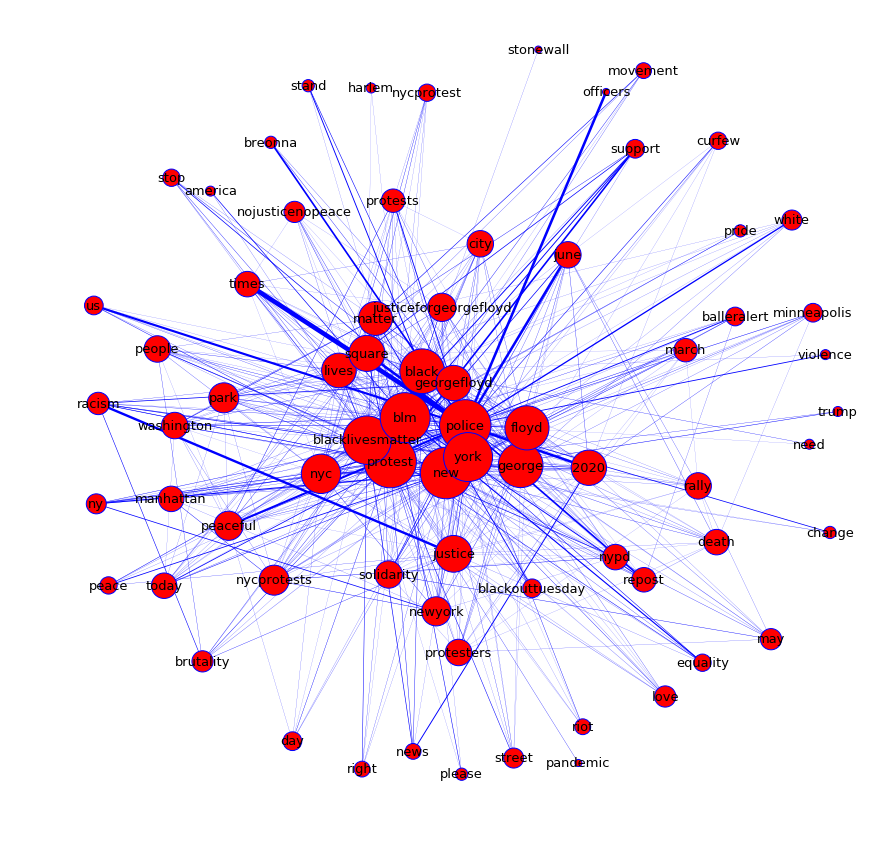

In [193]:
import matplotlib.pyplot as plt
import networkx as nx
import graphviz

G = nx.Graph()

for n in range(len(blm_edges)):
    G.add_edge(blm_edges[n][0], blm_edges[n][1], weight=blm_weights[n])
    
d = dict(G.degree)

# graph layout type
pos = nx.spring_layout(G,k=4)

# nodes
nx.draw_networkx_nodes(G, pos, node_color = 'r', node_size=[v * 50 for v in d.values()]).set_edgecolor('b')

# edges
nx.draw_networkx_edges(G, pos, edgelist=G.edges,edge_color = 'b',width=[v * 0.01 for v in blm_counter_fil.values()])

# labels
nx.draw_networkx_labels(G, pos, font_size=13, font_family='sans-serif')

fig = plt.figure(1,figsize=(15,15))
fig.set_figheight(15)
fig.set_figwidth(15)
plt.axis('off')
plt.show()

In [194]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

def community_layout(g, partition):
    """
    Compute the layout for a modular graph.


    Arguments:
    ----------
    g -- networkx.Graph or networkx.DiGraph instance
        graph to plot

    partition -- dict mapping int node -> int community
        graph partitions


    Returns:
    --------
    pos -- dict mapping int node -> (float x, float y)
        node positions

    """

    pos_communities = _position_communities(g, partition, scale=3.)

    pos_nodes = _position_nodes(g, partition, scale=1.)

    # combine positions
    pos = dict()
    for node in g.nodes():
        pos[node] = pos_communities[node] + pos_nodes[node]

    return pos

def _position_communities(g, partition, **kwargs):

    # create a weighted graph, in which each node corresponds to a community,
    # and each edge weight to the number of edges between communities
    between_community_edges = _find_between_community_edges(g, partition)

    communities = set(partition.values())
    hypergraph = nx.DiGraph()
    hypergraph.add_nodes_from(communities)
    for (ci, cj), edges in between_community_edges.items():
        hypergraph.add_edge(ci, cj, weight=len(edges))

    # find layout for communities
    pos_communities = nx.spring_layout(hypergraph, **kwargs)

    # set node positions to position of community
    pos = dict()
    for node, community in partition.items():
        pos[node] = pos_communities[community]

    return pos

def _find_between_community_edges(g, partition):

    edges = dict()

    for (ni, nj) in g.edges():
        ci = partition[ni]
        cj = partition[nj]

        if ci != cj:
            try:
                edges[(ci, cj)] += [(ni, nj)]
            except KeyError:
                edges[(ci, cj)] = [(ni, nj)]

    return edges

def _position_nodes(g, partition, **kwargs):
    """
    Positions nodes within communities.
    """

    communities = dict()
    for node, community in partition.items():
        try:
            communities[community] += [node]
        except KeyError:
            communities[community] = [node]

    pos = dict()
    for ci, nodes in communities.items():
        subgraph = g.subgraph(nodes)
        pos_subgraph = nx.spring_layout(subgraph,k=10,iterations=20)
        #pos_subgraph = nx.spring_layout(subgraph, **kwargs)
        pos.update(pos_subgraph)

    return pos

def test():
    # to install networkx 2.0 compatible version of python-louvain use:
    # pip install -U git+https://github.com/taynaud/python-louvain.git@networkx2
    from community import community_louvain

    g = nx.Graph()

    for n in range(len(blm_edges)):
        g.add_edge(blm_edges[n][0], blm_edges[n][1], weight=blm_weights[n])
        
    partition = community_louvain.best_partition(g)
    
    for key, value in partition.items():
        if partition[key] == 0:
            partition[key] = 'r'
        elif partition[key] == 1:
            partition[key] = 'g'
        elif partition[key] == 2:
            partition[key] = 'y'
        else:
            partition[key] = 'w'
    
    pos = community_layout(g, partition)
    
    # nodes
    nx.draw_networkx_nodes(g, pos, node_color = list(partition.values()), node_size=[v * 50 for v in d.values()]).set_edgecolor('b')

    # edges
    nx.draw_networkx_edges(g, pos, edgelist=G.edges,edge_color = 'b',width=[v * 0.005 for v in blm_counter_fil.values()])
    
    # labels
    nx.draw_networkx_labels(g, pos, font_size=10, font_family='sans-serif')
    
    fig = plt.figure(1,figsize=(15,15))
    fig.set_figheight(15)
    fig.set_figwidth(15)
    plt.axis('off')
    plt.show()
    return

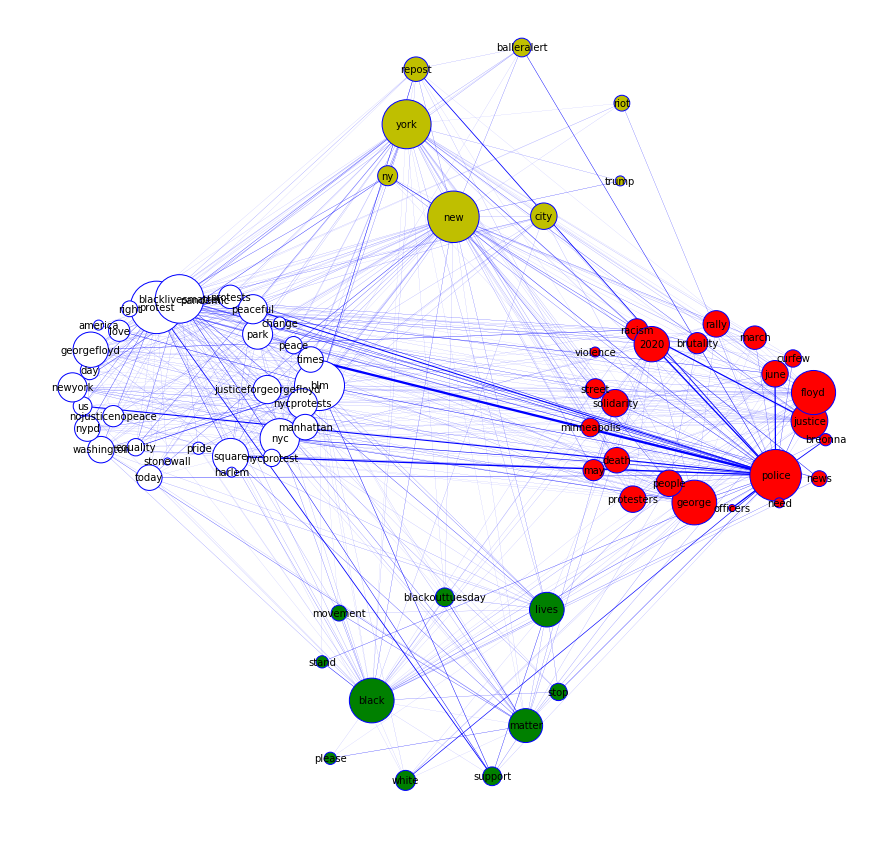

In [195]:
test()

### Creating JSON file

In [196]:
from community import community_louvain

g = nx.Graph()

for n in range(len(blm_edges)):
    g.add_edge(blm_edges[n][0], blm_edges[n][1], weight=blm_weights[n])

# creating groups using the Louvain method
partition = community_louvain.best_partition(g)

print("blm edges")
print(blm_edges[:5])

def get_index(keyword):
    return(all_blm_keywords.index(keyword)+1)

blm_source = [int(i) for i in [get_index(edge[0]) for edge in blm_edges]]

blm_target = [int(i) for i in [get_index(edge[1]) for edge in blm_edges]]

print("blm edge weights")
print(blm_weights[:5])

print("blm node keywords")
all_blm_keywords = list(d.keys())
print(all_blm_keywords[:5])

print("blm node weights")
keyword_weight = [str(i) for i in list(d.values())]
print(keyword_weight[:5])

print("blm node id_num")
id_num = [i+1 for i in range(len(all_blm_keywords))]
print(id_num[:5])

print("blm node group")
group = [str(i) for i in list(partition.values())]
print(group[:5])

blm edges
[('police', 'racism'), ('police', 'support'), ('news', 'police'), ('ny', 'protest'), ('brutality', 'racism')]
blm edge weights
[32, 18, 14, 16, 21]
blm node keywords
['police', 'racism', 'support', 'news', 'ny']
blm node weights
['53', '10', '7', '5', '8']
blm node id_num
[1, 2, 3, 4, 5]
blm node group
['0', '0', '1', '0', '2']


In [197]:
import json

# creating json file to feed into D3 graph
# NOTE: after creating json file, you will have to do additional cleaning to get it into the correct
# format to feed into the D3 graph script
node_data = {'id':id_num,'name':all_blm_keywords,'value':keyword_weight,'group':group}
node_df = pd.DataFrame(data=node_data)

edge_data = {'source':blm_source,'target':blm_target,'weight':blm_weights}
edge_df = pd.DataFrame(data=edge_data)

print(edge_df.head())

node_json = json.loads(node_df.to_json(orient='records'))
edge_json = json.loads(edge_df.to_json(orient='records'))

with open('mn_graph.json', 'w') as f:
    json.dump({'nodes':node_json,'links':edge_json}, f)

   source  target  weight
0      66      19      32
1      66       3      18
2      47      66      14
3      30      32      16
4      51      19      21
